In [1]:
pip install transformers

In [2]:
pip install youtube_transcript_api

In [3]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi

In [5]:
youtube_video="https://www.youtube.com/watch?v=FkQWpQd9Zdo"

In [6]:
video_id=youtube_video.split("=")[1]

In [7]:
video_id

'FkQWpQd9Zdo'

In [8]:
from IPython.display import YouTubeVideo

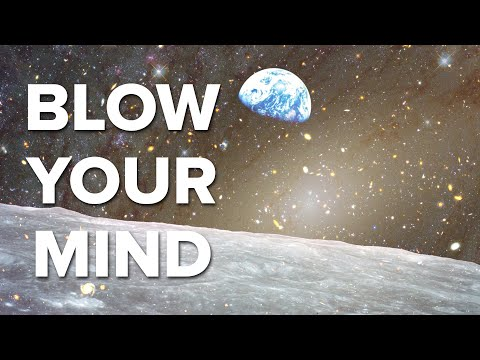

In [9]:
YouTubeVideo(video_id)

In [10]:
transcript=YouTubeTranscriptApi.get_transcript(video_id, languages=['en-US'])

In [11]:
transcript[0:3]

[{'text': '- [Narrator] This is Earth.', 'start': 0.18, 'duration': 1.653},
 {'text': '(dramatic music)', 'start': 2.195, 'duration': 2.75},
 {'text': 'This is where you live,', 'start': 5.71, 'duration': 1.15}]

In [12]:
result=""
for i in transcript:
  result+=" "+i['text']
print(len(result))

2989


In [15]:
summerizer=pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [27]:
iteration = int(len(result)/1000)
summarized_text = []

for i in range(iteration+1):
  start=0
  start=i*1000
  end=(i+1)*1000
  print('Input text \n'+result[start:end])
  output=summerizer(result[start:end])
  output=output[0]['summary_text']
  print('Summary text \n'+ output)
  summarized_text.append(output)
print(summarized_text)


Input text 
 - [Narrator] This is Earth. (dramatic music) This is where you live, and this is where you
live in your neighborhood, the Solar System. Here's the distance between the Earth and the moon. Doesn't look too far, does it? Think again. At their farthest points, the Earth and the moon
are 252,088 miles away. In side that distance,
you could fit every planet in our entire Solar System. But, let's talk about planets. The great red spot on Jupiter, that's about two times as big as Earth, and Saturn is about nine
times wider than Earth. Saturn's rings are so large that a few of the fragments within them are as large as mountains.
(intense music) But, that's nothing compared to our Sun. Just remember, this is Earth, and this is Earth from the moon. This is Earth from Mars. Here's Earth from just
behind Saturn's rings, and here's Earth from just beyond Neptune, four billion miles away. But, a billion's a big number, so let's put that in perspective. One million seconds equals
about 1

In [25]:
len(str(summarized_text))

898

In [26]:
str(summarized_text)

'[" At their farthest points, the Earth and the moon are 252,088 miles away . In side that distance, you could fit every planet in our entire Solar System . But, that\'s nothing compared to our Sun . One million seconds equals 11 and a half seconds .", \' Carl Sagan once mused that the number of stars in the universe is larger than all the grains of sand on all the beaches of the planet Earth . The biggest star we know is about 2,000 times the size of our Sun . The Milky Way galaxy is about 100,000 light years wide, when converted to miles, is about 621,371,19 miles .\', \' NGC 6744, a spiral galaxy similar to our own, is twice as wide as the Milky Way, stretching over 200,000 light years across . In this picture alone, there are thousands of galaxies, each containing millions of stars with their own planets . Some of the objects seen here may have formed as many as 11 billion years ago .\']'